# Exploratory Data Analysis of RADS pkl

#### Charlotte Burbridge! :)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
rads = pd.read_pickle('data-prep/pkl/rads.pkl')

In [74]:
rads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    794 non-null    object 
 1   Time    794 non-null    object 
 2   Score   701 non-null    float64
 3   Level   794 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 24.9+ KB


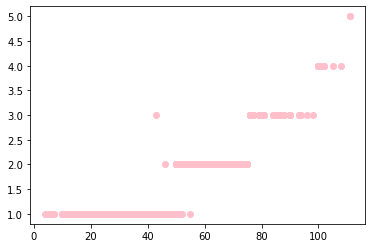

In [75]:
x = rads['Score']
y = rads['Level']

plt.scatter(x, y, c ="pink")

plt.show()

In [76]:
rads['Score'].value_counts()

50.0     51
49.0     35
47.0     21
46.0     17
41.0     16
         ..
24.0      1
108.0     1
28.0      1
101.0     1
98.0      1
Name: Score, Length: 91, dtype: int64

In [77]:
rads['Date']= pd.to_datetime(rads['Date'])

In [78]:
rads['Month'] = rads['Date'].dt.strftime('%m')

In [79]:
rads['Year'] = rads['Date'].dt.strftime('%y')
rads['Year'] = rads['Year'].astype('int')

In [80]:
rads2012 = rads[rads['Year'] >= 12]

#### Things to Work on

- Rads over time visualization
- Look at avalanche occurances in comparsion with the RADS Level (Do the Levels Correlate with what actually happens?)

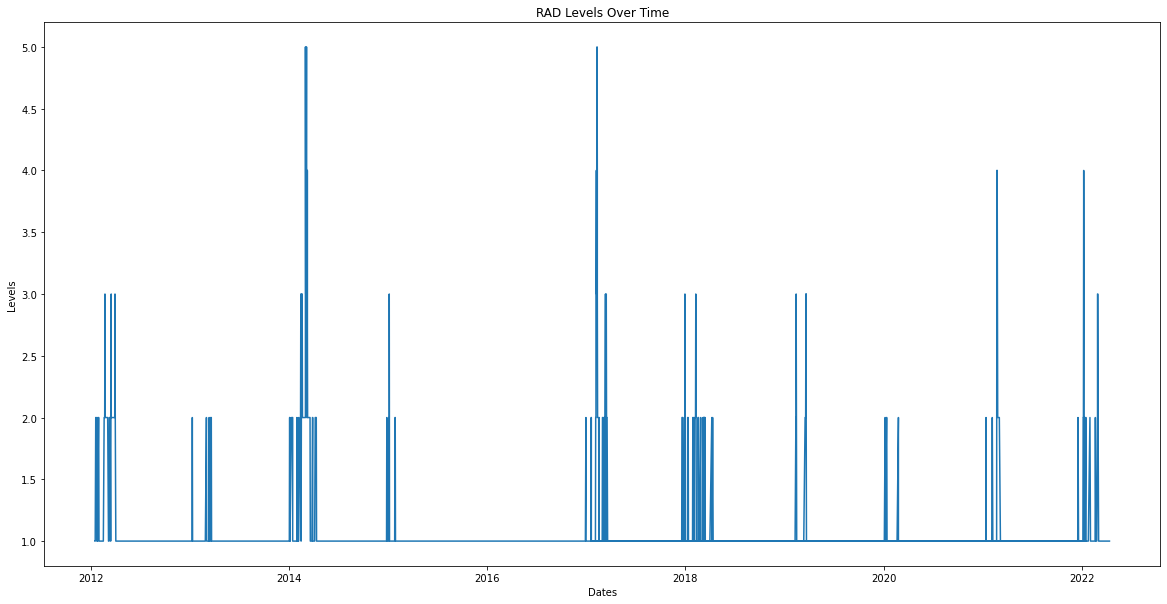

In [81]:
xx = rads2012['Date']
yy = rads2012['Level']

fig = plt.figure(figsize = (20, 10))
 
plt.plot(xx, yy)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("RAD Levels Over Time")
plt.show()

In [82]:
# That's not very nice to looking so I think I should change the type of visualization
# Can I combine this with avalanche data to see when avalanches actually happened?

In [83]:
rads2012['Level'].value_counts()

1    323
2    175
3     45
4      8
5      4
Name: Level, dtype: int64

In [84]:
avy = pd.read_pickle('data-prep/pkl/avy_obs.pkl')
avy["ignore"] = np.nan
avy["ignore"].fillna(5, inplace=True)

# https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe

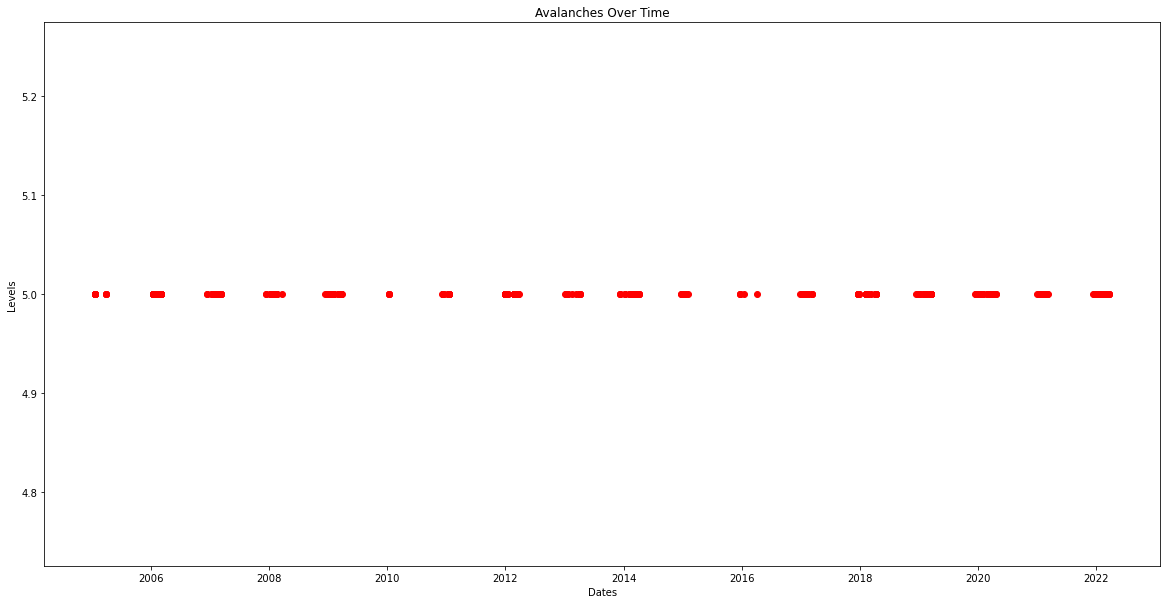

In [85]:
ex = avy['avobsdate']
why = avy['ignore']

fig = plt.figure(figsize = (20, 10))

plt.scatter(ex, why, color = 'red')

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("Avalanches Over Time")
plt.show()

In [86]:
avy['Date']= avy['avobsdate']

In [87]:
radsavy = pd.merge(rads, avy, on=["Date"])
#https://realpython.com/pandas-merge-join-and-concat/

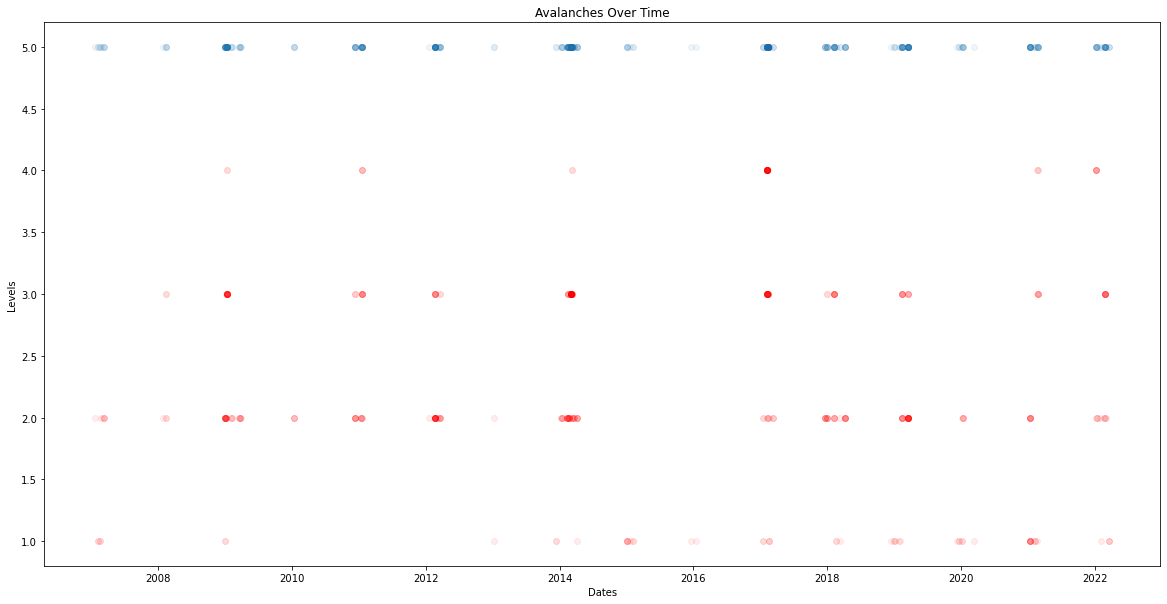

In [88]:
x = radsavy['Date']
y = radsavy['Level']
ys = radsavy['ignore']

fig = plt.figure(figsize = (20, 10))

plt.scatter(x, y, color = 'red', alpha=0.07)
plt.scatter(x, ys, alpha=0.07)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("Avalanches Over Time")
plt.show()

#### maybe i should do plots for each month, 2012 to 2022?
- make copy of radsavy for year 
- graph

In [89]:
radsavy2012 = radsavy[radsavy['Year'] == 12]

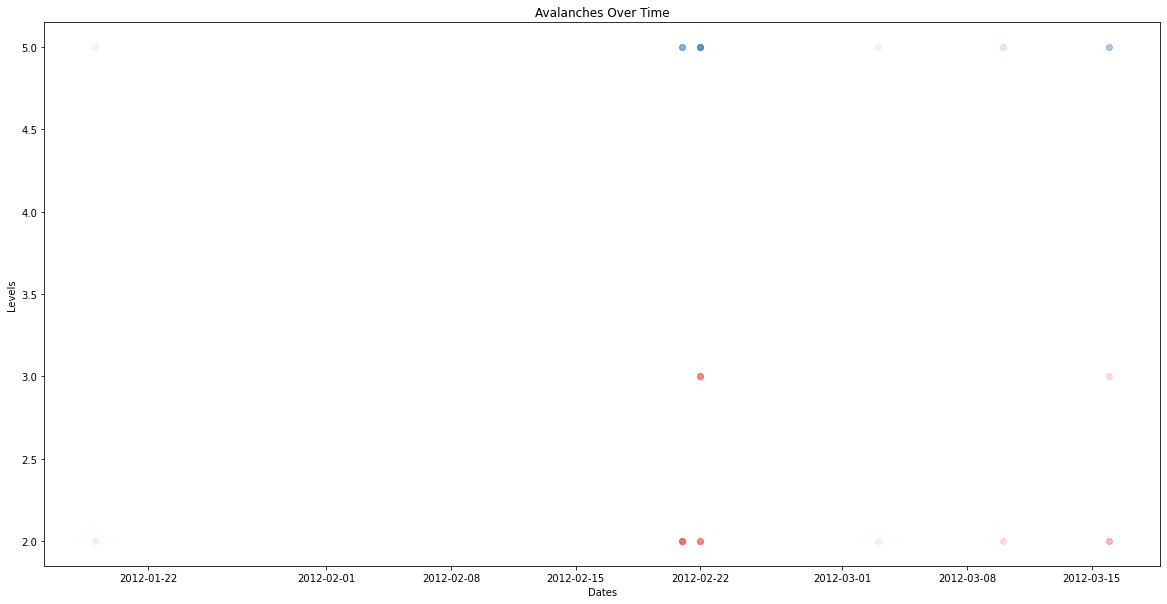

In [90]:
x = radsavy2012['Date']
y = radsavy2012['Level']
ys = radsavy2012['ignore']

fig = plt.figure(figsize = (20, 10))

plt.scatter(x, y, color = 'red', alpha=0.07)
plt.scatter(x, ys, alpha=0.07)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("Avalanches Over Time")
plt.show()

okay that didn't really work